In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import scipy



/Users/victor/Desktop/Projects/CS370/Module 3/CIFAR10_Project/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
# Define the model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/Users/victor/Desktop/Projects/CS370/Module 3/CIFAR10_Project/myenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    rotation_range=0, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=False)

datagen.fit(x_train)

# Train the model
batch_size = 32
epochs = 25

def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

callbacks = [LearningRateScheduler(lr_schedule)]

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)


Epoch 1/25
   4/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1204 - loss: 2.3266   

/Users/victor/Desktop/Projects/CS370/Module 3/CIFAR10_Project/myenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3177 - loss: 1.8290 - val_accuracy: 0.5354 - val_loss: 1.3163 - learning_rate: 0.0010
Epoch 2/25
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.4688 - loss: 1.3402

2024-07-20 21:23:40.793906: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4688 - loss: 1.3402 - val_accuracy: 0.5397 - val_loss: 1.3105 - learning_rate: 0.0010
Epoch 3/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5154 - loss: 1.3398 - val_accuracy: 0.6334 - val_loss: 1.0339 - learning_rate: 0.0010
Epoch 4/25
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5000 - loss: 1.1869

2024-07-20 21:24:23.798554: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5000 - loss: 1.1869 - val_accuracy: 0.6394 - val_loss: 1.0210 - learning_rate: 0.0010
Epoch 5/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5801 - loss: 1.1736 - val_accuracy: 0.6749 - val_loss: 0.9361 - learning_rate: 0.0010
Epoch 6/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5000 - loss: 1.0924 - val_accuracy: 0.6744 - val_loss: 0.9280 - learning_rate: 0.0010
Epoch 7/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6234 - loss: 1.0622 - val_accuracy: 0.6692 - val_loss: 0.9310 - learning_rate: 0.0010
Epoch 8/25
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5625 - loss: 1.1587

2024-07-20 21:25:52.246621: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5625 - loss: 1.1587 - val_accuracy: 0.6699 - val_loss: 0.9291 - learning_rate: 0.0010
Epoch 9/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6460 - loss: 1.0068 - val_accuracy: 0.7048 - val_loss: 0.8627 - learning_rate: 0.0010
Epoch 10/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5625 - loss: 1.1059 - val_accuracy: 0.7084 - val_loss: 0.8464 - learning_rate: 0.0010
Epoch 11/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6891 - loss: 0.8908 - val_accuracy: 0.7341 - val_loss: 0.7608 - learning_rate: 1.0000e-04
Epoch 12/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.8611 - val_accuracy: 0.7349 - val_loss: 0.7605 - learning_rate: 1.0000e-04
Epoch 13/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6946 - loss: 0.8629 - val_accuracy: 0.7357 - val_loss: 0.7642 - learning_rate: 1.0000e-04
Epoch 14/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy

2024-07-20 21:28:54.172470: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6250 - loss: 0.9727 - val_accuracy: 0.7441 - val_loss: 0.7411 - learning_rate: 1.0000e-04
Epoch 17/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7065 - loss: 0.8339 - val_accuracy: 0.7391 - val_loss: 0.7473 - learning_rate: 1.0000e-04
Epoch 18/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.9376 - val_accuracy: 0.7390 - val_loss: 0.7474 - learning_rate: 1.0000e-04
Epoch 19/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7098 - loss: 0.8226 - val_accuracy: 0.7431 - val_loss: 0.7362 - learning_rate: 1.0000e-04
Epoch 20/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6562 - loss: 1.2122 - val_accuracy: 0.7432 - val_loss: 0.7360 - learning_rate: 1.0000e-04
Epoch 21/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7182 - loss: 0.8048 - val_accuracy: 0.7448 - val_loss: 0.7325 - learning_rate: 1.0000e-05
Epoch 22/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7450 - loss: 0.7202
Test loss: 0.7281584143638611
Test accuracy: 0.7444999814033508


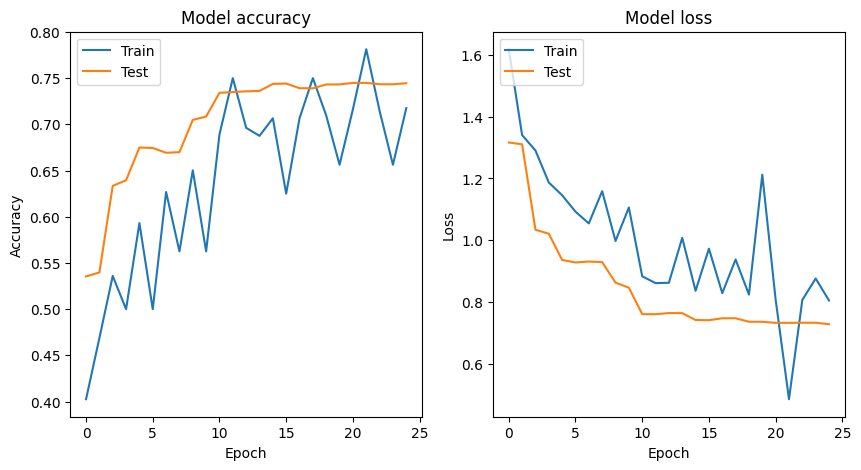

In [5]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# Ethical and Privacy Implications

The convolutional neural network (CNN) algorithm trained on the CIFAR-10 dataset can be adapted to recognize a variety of images beyond the current dataset. If this technology is used to distinguish people's faces, several ethical and privacy concerns arise:

1. **Privacy Invasion:** Facial recognition technology can lead to significant privacy invasion, as individuals can be tracked without their consent in public and private spaces.

2. **Misidentification and Bias:** There is a risk of misidentification, especially among minority groups, due to biases present in the training data. This can lead to wrongful accusations and discrimination.

3. **Surveillance and Control:** The deployment of facial recognition in surveillance systems can lead to a surveillance state where individuals' movements and actions are constantly monitored, infringing on personal freedoms and rights.

4. **Data Security:** The storage and management of biometric data pose significant security risks. If such data are compromised, it can lead to identity theft and other malicious activities.

To mitigate these issues, it is essential to establish stringent regulations and ethical guidelines governing the use of facial recognition technology. Transparency, accountability, and the right to privacy must be prioritized to ensure that technological advancements do not come at the cost of fundamental human rights.

**References:**
- [Facial Recognition Technology: Privacy and Legal Implications](https://www.aclu.org/other/facial-recognition-technology-privacy-and-legal-implications)
- [Bias in Facial Recognition Algorithms](https://www.nist.gov/news-events/news/2019/12/study-evaluates-effects-race-age-sex-facial-recognition-software)
- [Ethical Concerns in AI and Facial Recognition](https://www.weforum.org/agenda/2020/10/ai-facial-recognition-ethics/)
